In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
r=np.random.RandomState(100)#exposes a number of methods for generating random numbers drawn from a variety of probability distributions
lamb = 2; mu = 1; Xzero = 1;
T = 1; N = 2**9; dt = float(T)/N #parametros
M=1000
Xerr=np.zeros((M,5));


for s in range(M):
    dW=np.sqrt(dt)*np.random.randn(1,N)
    #dW=np.sqrt(dt)*np.random.normal(0.,1.,int(N));
    
    W = np.cumsum(dW);  # Return the cumulative sum of the elements along a given axis
#encontrei um erro na minha primeira versão do código, usei a função randn, mas por algum motivo o resultado de Winc sempre era zero, acabei por trocar para random.normal
    Xtrue = Xzero*np.exp((lamb-0.5*mu**2)*T+mu*W[-1])
   # plt.plot(np.arange(0,T, dt), Xtrue)
    #plt.title("all plots")
    for p in range(5):
        R=2**p; L=N/R; Dt=R*dt
        Xem=Xzero
        for j in range(1, int(L)+1):
            Winc=np.sum(dW[0][range(R*(j-1),R*j)])
            Xem = Xem + Dt*lamb*Xem + mu*Xem*Winc
        Xerr[s,p]=np.abs(Xem-Xtrue)
        
        

In [3]:

Xerr


array([[ 0.0895196 ,  0.11828862,  0.10906877,  0.2119903 ,  0.2142473 ],
       [-0.17436743,  0.03864751,  0.01345696, -0.46947505, -1.62598331],
       [-0.3230625 , -0.22023492, -0.03303164, -1.66956675, -2.42164449],
       ...,
       [ 0.18259217,  0.11411334,  0.1375313 ,  0.24825468, -0.98354463],
       [ 0.03880261,  0.2138624 ,  0.13718289, -0.0176866 ,  0.03834392],
       [-0.05738818,  0.43586833, -0.12937842, -0.67887363,  0.9975513 ]])

[0.001, 0.1, 0.0001, 1]

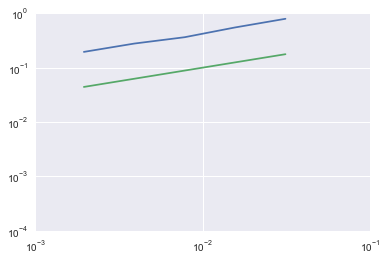

In [4]:
R = 4;dt = 1/N; Dt = R*dt; L = N//R; 
Xem = np.zeros(L);                 
Xtemp = Xzero; 
for j in range(0, int(L)):
  Winc = np.sum(dW[(R*(j-1)+R):(R*j+ R)]);
  #na versão do mathlab o final da equação é apenas(R*j), entretanto isso resulta e Winc=0, como conheço pouco do mathlab não soube dizer o motivo.
  
  Xtemp = Xtemp + Dt*lamb*Xtemp + mu*Xtemp*Winc;
  Xem[j] = Xtemp;

time_EM = np.arange(0,T,Dt)
Dtvals=dt*(np.power(2,range(5))) 
#dtvals= dt*(2.ˆ([0:4]);
plt.loglog(Dtvals,np.mean(Xerr,0))
plt.loglog(Dtvals,np.power(Dtvals,0.5))
plt.axis([1e-3, 1e-1, 1e-4, 1])



#reparei que o método não parece convergir sempre, a proximidade do método para o valor real difere muito dependendo do conjunto de dados.

#ref: https://jtsulliv.github.io/stock-movement/